In [2]:
# Importando librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Leyendo y conociendo el Dataframe (tabla)

In [29]:
# Leer el archivo CSV en un DataFrame
url = "https://second-public-bucket-acl-enabled.s3.us-east-2.amazonaws.com/ecommerce_events_history_in_electronic_store.csv"
df = pd.read_csv(url)

# Mostrar las 5 primeras filas del DataFrame
df.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [4]:
# Tipo de datos de las columnas y cantidad de No-nulos por columna del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB
None


In [30]:
# Valores NULOS por columna
print(df.isna().sum())

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64


Al encontrar más de 200 000 registros en blanco o nulos dentro de los campos "brand" y "category_code" no deberían de tomarse en cuenta para análisis posteriores.

Sin embargo, aún sería útil utilizar el campo category_code por ser complemento de category_id para consultar el nombre de cada categoría de cada producto siempre que category_code no sea un valor vacío. Asimismo, en un futuro aún se podría subsanar la carencia de integridad del campo category_code utilizando la data de category_id  y tablas con registros históricos de meses y años pasados.

In [23]:
# Valores Vacios(Blancos) por columna
print(df.applymap(lambda x: x == '').sum())

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [6]:
# Valores unicos por columna
print(df.nunique())

event_time       845041
event_type            3
product_id        53453
category_id         718
category_code       107
brand               999
price             12422
user_id          407283
user_session     490398
dtype: int64

## Analizando Variables

### Variable Tipo de Evento

In [31]:
# Cantidad de eventos por tipo de evento
print(df['event_type'].value_counts())

view        793748
cart         54035
purchase     37346
Name: event_type, dtype: int64


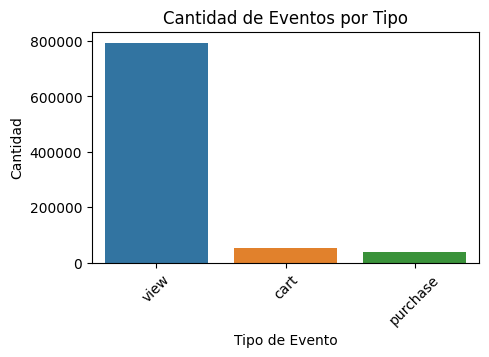

In [27]:
# Gráfico de barras de los tipos de eventos
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="event_type")
plt.title("Cantidad de Eventos por Tipo")
plt.xlabel("Tipo de Evento")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

### Variable Precio
Me permite conocer cómo está compuesto el precio, que tan alejados están entre si y cuál es su distribución

In [28]:
# Estadísticas descriptivas de columna "price" (única variable cuantitativa)
print(df.price.describe().round(2))


count    885129.00
mean        146.33
std         296.81
min           0.22
25%          26.46
50%          65.71
75%         190.49
max       64771.06
Name: price, dtype: float64


La variable "price" muestra una amplia gama de valores, desde un mínimo de 0.22 hasta un máximo de 64771.06. La media (146.33) es menor que la mediana (65.71), lo que podría indicar que hay valores atípicos (outliers) en el extremo superior de la distribución de precios, además de una mayor acumulación de valores por debajo del promedio (146.33) que por encima del mismo.

Los valores del primer cuartil (25%) y tercer cuartil (75%) indican que la mayoría de los precios caen dentro de un rango relativamente amplio entre 26.46 y 190.49.

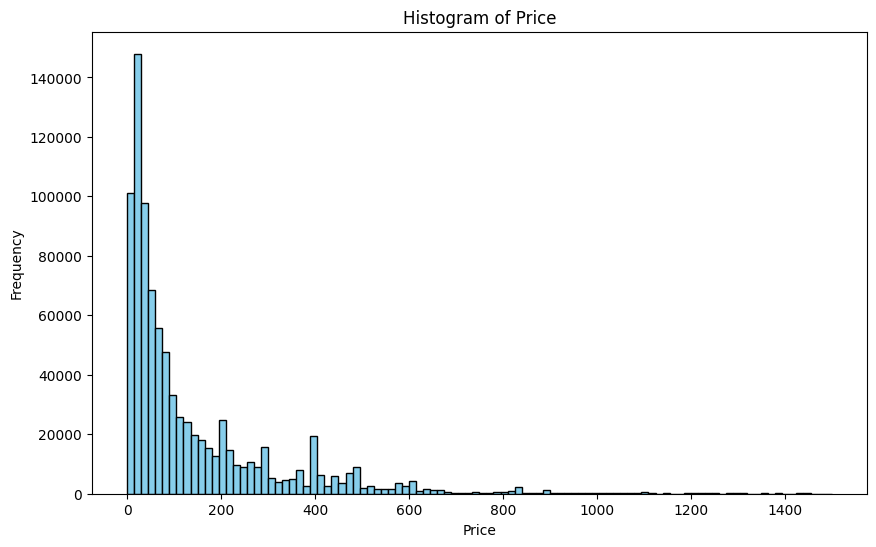

In [24]:
# Histograma de precio
plt.figure(figsize=(10, 6))
plt.hist(df.price, bins=100, range=(0,1500), color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

- Al ser el promedio mucho más alto que la media, esto indicaría que hay mayor cantidad de valores menores con respecto al promedio (146.33) y la curvatura de la distribución esta hacia la izquierda

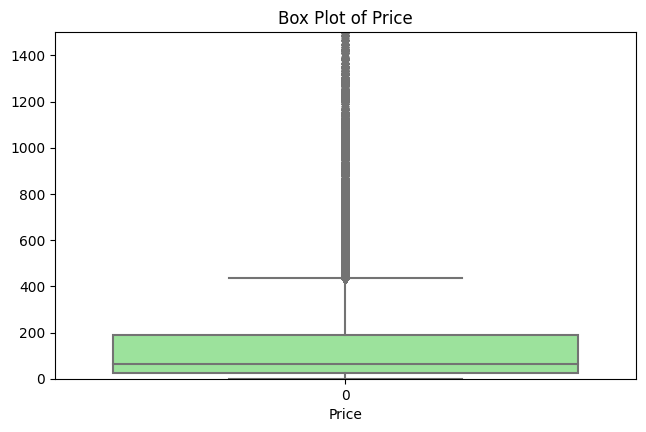

In [25]:
# Boxplot
plt.figure(figsize=(7.5, 4.5))
sns.boxplot(data=df.price, color='lightgreen')
plt.xlabel('Price')
plt.title('Box Plot of Price')

# Ajustar el rango del eje y (vertical)
plt.ylim(0, 1500)

plt.show()

Demasiados valores atípicos (outliers) en el extremo superior de la distribución de precios por encima del Q3+1.5*IQR. Los valores que superan Q3+1.5*IQR no necesariamente deben ser eliminados, se analizará el contexto de estos datos y se tomará una decisión.